In [8]:
import numpy as np 
import matplotlib.pyplot as plt


In [7]:
input_patterns = np.array( [ [0, 0], [0, 1], [1, 0], [1, 1] ] ) #act of input neurons 
targets = np.array ([ [0], [1], [1], [0] ]) #target act of output neurons 

In [53]:
def get_weight_biases(seed):
    np.random.seed(seed)
    weight_dict = dict()
    weight_dict['H'] = {'I': np.random.uniform(-1, 1, size = (2, 2))} #input to hidden weights 
    weight_dict['Out'] = {'H': np.random.uniform(-1, 1, size = (2, 1))} #output neurons weight from hidden 
    bias_dict = {'H': np.random.uniform(-1, 1, size = (2, )), 
             'Out': np.random.uniform(-1, 1, size = (1,)) }
    return weight_dict, bias_dict
    
    


In [14]:
def Relu(x):
    y = np.copy(x)
    indexes = np.where(x < 0)
    y[indexes] = 0
    return y  

def Relu_derivative(x): #slope of relu function 
    y = np.ones_like(x)
    indexes = np.where(x < 0)
    y[indexes] = 0
    return y  
    

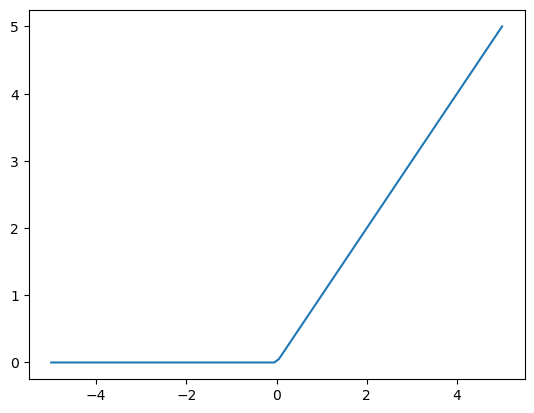

In [15]:
plt.figure()
x = np.linspace(-5, 5, 100)
plt.plot(x, Relu(x))

In [29]:
def forward(input_patterns, weight_dict, bias_dict):
    act_dict = {}
    state_dict = {}
    act_dict['I'] = input_patterns 
    state_dict['H'] = np.dot(input_patterns, weight_dict['H']['I']) + bias_dict['H'] #hidden state act 
    act_dict['H'] = Relu(state_dict['H']) #firing rates hid neurons
    state_dict['Out'] = np.dot(act_dict['H'], weight_dict['Out']['H']) + bias_dict['Out']
    act_dict['Out'] = Relu(state_dict['Out']) #firing rate output
    return state_dict, act_dict

In [30]:
state_dict, act_dict = forward(input_patterns, weight_dict, bias_dict)
print(state_dict, act_dict)

{'H': array([[-0.44704571, -0.31336881],
       [-0.42755466, -0.76969739],
       [ 0.52550794,  0.43341508],
       [ 0.54499899, -0.02291349]]), 'Out': array([[0.72431787],
       [0.72431787],
       [0.30756428],
       [0.54655961]])} {'I': array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]]), 'H': array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.52550794, 0.43341508],
       [0.54499899, 0.        ]]), 'Out': array([[0.72431787],
       [0.72431787],
       [0.30756428],
       [0.54655961]])}


In [31]:
def backward(weight_dict, state_dict, act_dict, targets):
    grad_dict = {}
    grad_dict['Out'] = (act_dict['Out'] - targets) * Relu_derivative(state_dict['Out'] ) # DE/dzout = DE/Daout * Daout/dzout 
    error = np.sum(0.5 * (targets - act_dict['Out']) ** 2) 
    grad_dict['H'] = np.dot(grad_dict['Out'], weight_dict['Out']['H'].T) * Relu_derivative(state_dict['H']) #De/dzhidden = De/dzout * dzout/dahidden * dahidden/dzhidden
    return grad_dict, error 

In [32]:
print(state_dict)


{'H': array([[-0.44704571, -0.31336881],
       [-0.42755466, -0.76969739],
       [ 0.52550794,  0.43341508],
       [ 0.54499899, -0.02291349]]), 'Out': array([[0.72431787],
       [0.72431787],
       [0.30756428],
       [0.54655961]])}


In [33]:
grad_dict, error = backward(weight_dict, state_dict, act_dict, targets)

In [34]:
print(grad_dict)
print(error)

{'Out': array([[ 0.72431787],
       [-0.27568213],
       [-0.69243572],
       [ 0.54655961]]), 'H': array([[-0.        , -0.        ],
       [ 0.        ,  0.        ],
       [ 0.22584659,  0.39198195],
       [-0.17826727, -0.        ]])}
0.6894158221039279


In [43]:
def step(weight_dict, bias_dict, grad_dict, act_dict, learning_rate):
    for post_pop in weight_dict:
        for pre_pop in weight_dict[post_pop]:
            d_w = -learning_rate * np.outer(act_dict[pre_pop], grad_dict[post_pop])
            weight_dict[post_pop][pre_pop] += d_w
            bias_dict[post_pop] += -learning_rate * grad_dict[post_pop] 
            

In [57]:
def train (input_patterns, targets, weight_dict, bias_dict, learning_rate, num_epochs, seed):
    error_hx = [] #accmulate error 
    np.random.seed(seed)
    for epoch in range(num_epochs):
        indexes = np.arange(len(input_patterns))
        np.random.shuffle(indexes)
        for index in indexes:
            sample = input_patterns[index]
            target = targets[index]
            state_dict, act_dict = forward(sample, weight_dict, bias_dict)
            grad_dict, error = backward(weight_dict, state_dict, act_dict, target)
            step(weight_dict, bias_dict, grad_dict, act_dict, learning_rate)
            error_hx.append(error)
    
    return error_hx
        
    

In [50]:
learning_rate = 0.01

In [51]:
state_dict, act_dict = forward(input_patterns[1], weight_dict, bias_dict)
grad_dict, error = backward(weight_dict, state_dict, act_dict, targets[1])
step(weight_dict, bias_dict, grad_dict, act_dict, learning_rate)

In [41]:
ex_grad = np.array([1, -1])
ex_act = np.array([0.5, 0.25])
print(np.outer(ex_act, ex_grad))

[[ 0.5  -0.5 ]
 [ 0.25 -0.25]]


In [48]:
print(np.outer(ex_grad, ex_act.T))

[[ 0.5   0.25]
 [-0.5  -0.25]]


In [64]:
paramseed = 2020
trainseed = 0
learning_rate = 0.001
weight_dict, bias_dict = get_weight_biases(paramseed)
loss_hx = train(input_patterns, targets, weight_dict, bias_dict, learning_rate, num_epochs = 3000, seed = trainseed)

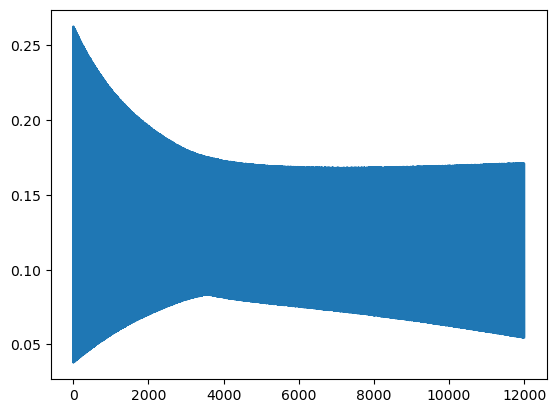

In [65]:
plt.figure()
plt.plot(loss_hx)

In [3]:
d = {'dict1': {'foo': 1, 'bar': 2}, 'dict2': {'baz': 3, 'quux': 4}}

In [8]:
for d['dict1'] in d.items():
    print(d['dict1'])

('dict1', 'dict2')
('dict2', {'baz': 3, 'quux': 4})
